# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [87]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3

import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score, f1_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, StackingClassifier

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [5]:
# Mounting google collab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Datasets/EasyVisa.csv')

## Data Overview

- Observations
- Sanity checks

In [7]:
df.head(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [9]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [10]:
#check for duplicates and nulls
print(df.isnull().values.any())

df.duplicated().value_counts()


False


False    25480
dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

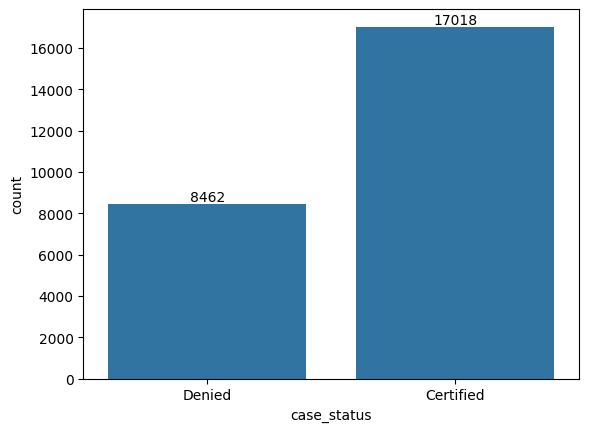

In [11]:
ax = sns.countplot(df, x = 'case_status') # checking the ratio of approvals for visas
for i in ax.containers:
    ax.bar_label(i,)

In [12]:
tot = df.shape[0] #looking at the percent of visas that are denied

print('percent denied:', df.case_status.value_counts()['Denied']/tot * 100)



percent denied: 33.210361067503925


<Axes: xlabel='prevailing_wage', ylabel='Count'>

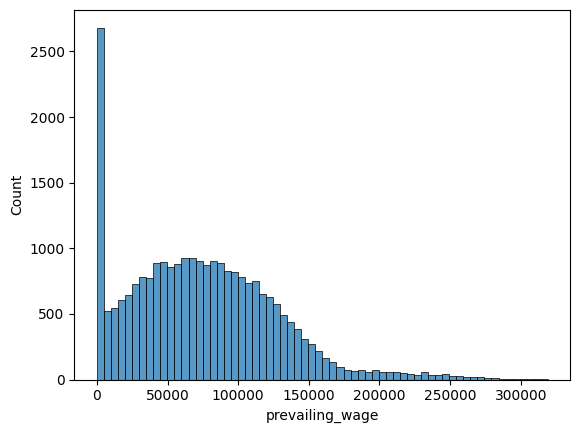

In [13]:
sns.histplot(df, x = 'prevailing_wage') #histogram plot for prevailing wage

In [14]:
df.no_of_employees.mode() #checking most common number of employees

0    183
Name: no_of_employees, dtype: int64

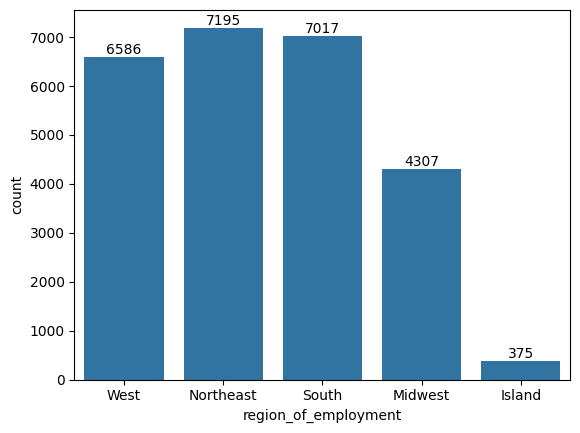

In [15]:
ax = sns.countplot(df, x = 'region_of_employment') #looking at the prevalence of each region
for i in ax.containers:
    ax.bar_label(i,)


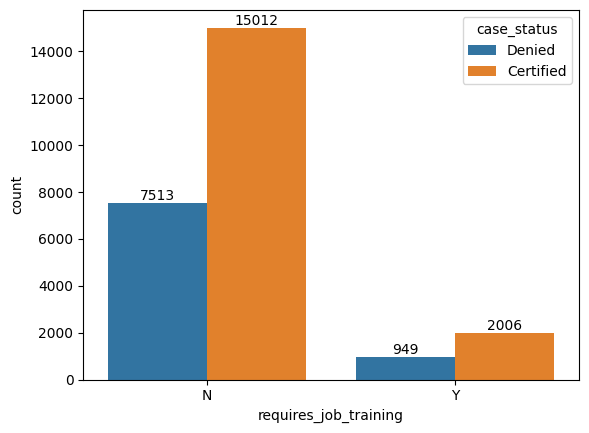

In [16]:
ax = sns.countplot(df, x = 'requires_job_training', hue = 'case_status') #looking at how job training affects visa approval
for i in ax.containers:
    ax.bar_label(i,)

Requiring job training does not seem to be a strong factor when it comes to visa approval, both categories having very similar ratios

In [17]:
for feature in df.columns:
  if df[feature].dtype == 'object':
    print(df[feature].value_counts()) #checking the counts for the categorical values

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
Y    14802
N    10678
Name: has_job_experience, dtype: int64
N    22525
Y     2955
Name: requires_job_training, dtype: int64
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
Y    22773
N     2707
Name: full_time_position, dtype: int64
Certified    17018
Denied        8462
Name: case_status, dtype: int64


<Figure size 1500x1500 with 0 Axes>

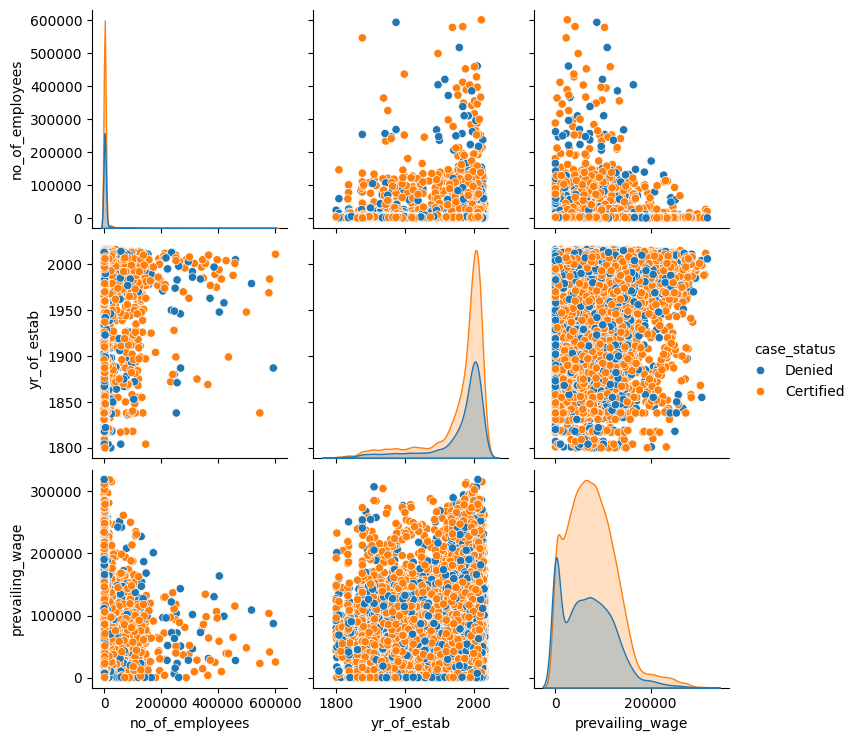

In [97]:
sns.pairplot(df, hue = 'case_status') #creating a pairplot with the numerical values, using case status

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


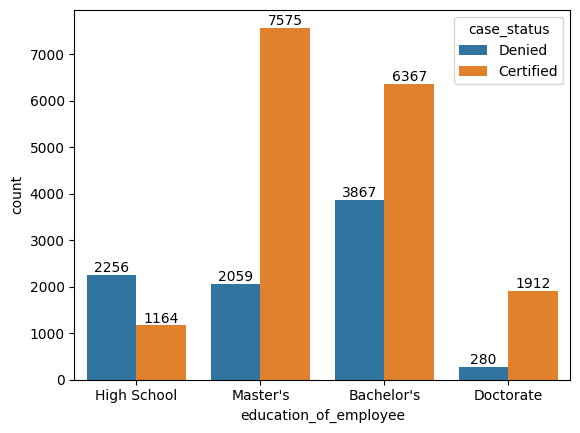

In [19]:
ax = sns.countplot(df, x = 'education_of_employee', hue = 'case_status') #charting relationship between education and visa status
for i in ax.containers:
    ax.bar_label(i,)

People of higher education have a higher rate of acceptance for visas.

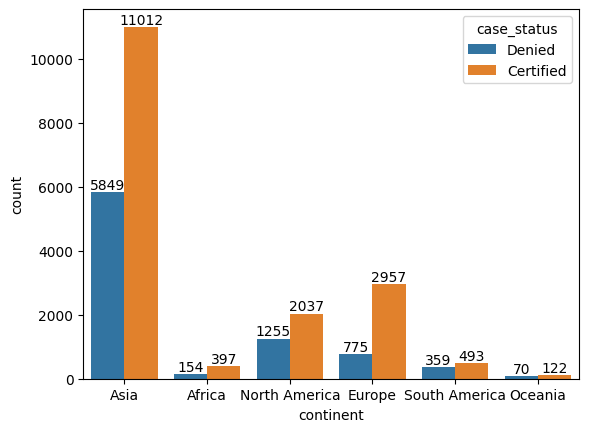

In [20]:
ax = sns.countplot(df, x = 'continent', hue = 'case_status') #charting relationship between continent and visa status
for i in ax.containers:
    ax.bar_label(i,)

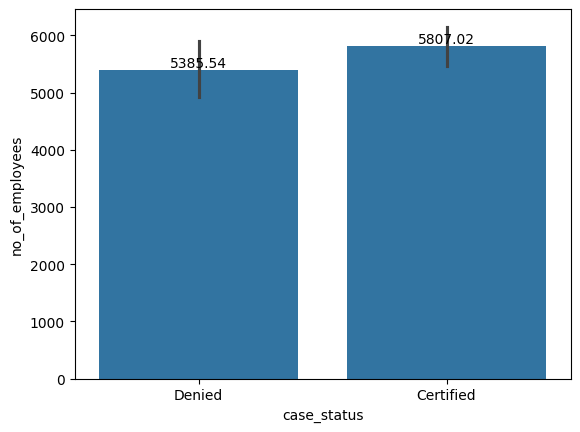

In [156]:
ax = sns.barplot(df, x = 'case_status', y = 'no_of_employees')
for i in ax.containers:
    ax.bar_label(i,)

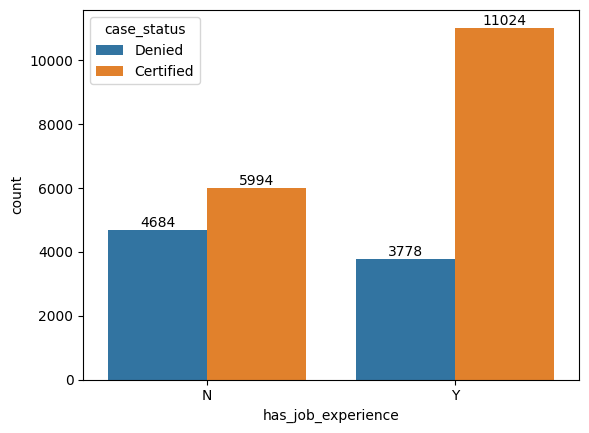

In [21]:
ax = sns.countplot(df, x = 'has_job_experience', hue = 'case_status') #checking relationship betweeen job experience and visa status
for i in ax.containers:
    ax.bar_label(i,)

Job experience seems to greatly increase the ratio of approvals

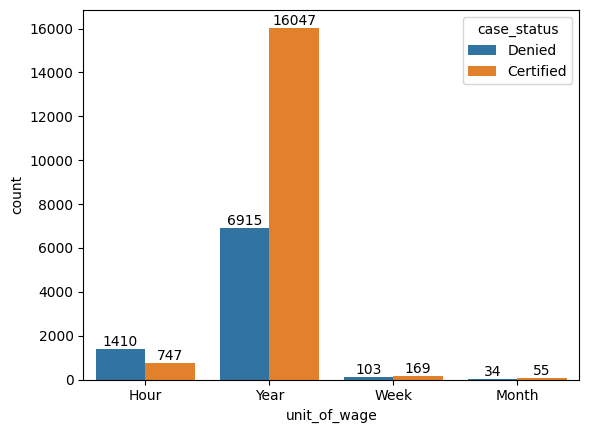

In [22]:
ax = sns.countplot(df, x = 'unit_of_wage', hue = 'case_status') #checking relationship betweeen job experience and visa status
for i in ax.containers:
    ax.bar_label(i,)

People that are payed on a yearly basis both constitute the majority of applicants for visas and have the best likelihood of being accepted.

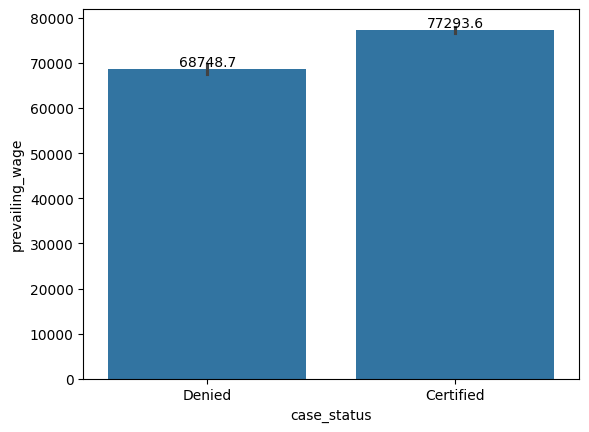

In [23]:
ax = sns.barplot(df, x = 'case_status', y = 'prevailing_wage') #checking relationship betweeen prevaling wage and visa status
for i in ax.containers:
    ax.bar_label(i,)

<Axes: xlabel='prevailing_wage', ylabel='Count'>

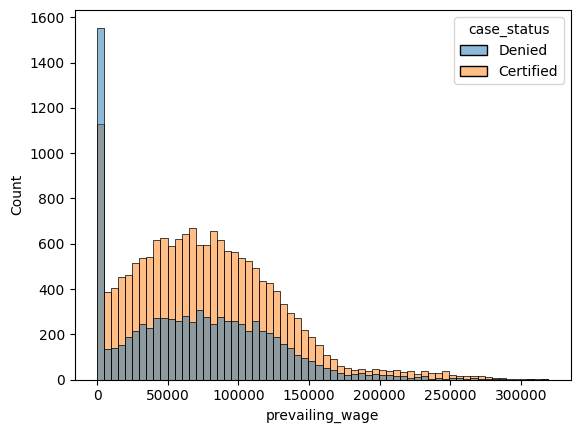

In [24]:
sns.histplot(df, x = 'prevailing_wage', hue = 'case_status')

In [25]:
df.prevailing_wage.describe()

count     25480.000000
mean      74455.814592
std       52815.942327
min           2.136700
25%       34015.480000
50%       70308.210000
75%      107735.512500
max      319210.270000
Name: prevailing_wage, dtype: float64

In [26]:
df.prevailing_wage.mode()

0        100.66
1        102.70
2        105.96
3        108.12
4        109.06
5        110.51
6        111.11
7        113.60
8        118.43
9        122.65
10       127.89
11       134.15
12       138.76
13      6036.67
14     21894.51
15     24258.73
16     58770.05
17     60948.15
18     64357.58
19     74645.92
20     82560.28
21     87751.88
22     88664.77
23     93356.03
24    126813.75
25    149907.39
Name: prevailing_wage, dtype: float64

It appears that prevailing wage is slighly lower for those that are denied. Additionally, in the histogram, those with the lowest prevailing wages were denied disproportionately

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [28]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [142]:
df.duplicated().value_counts()

False    25480
dtype: int64

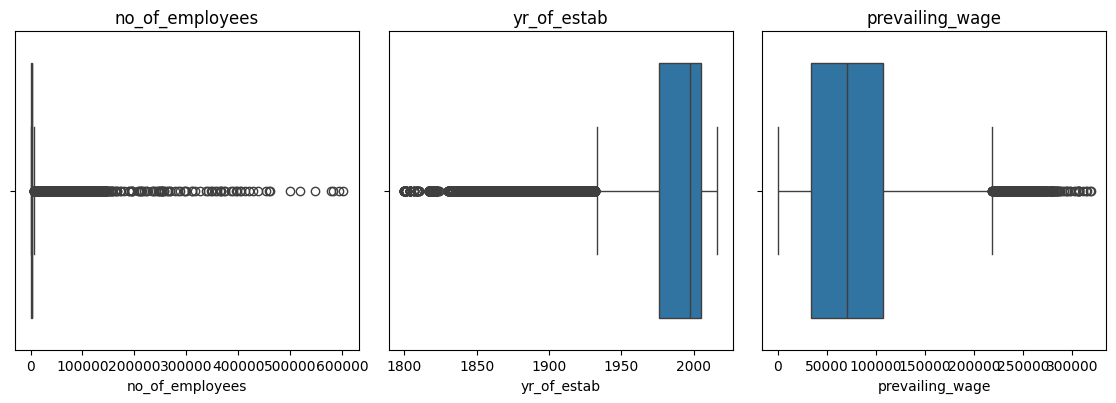

In [29]:
nums = df.select_dtypes(exclude = object).columns.tolist() #creating a list of the numerical values

plt.figure(figsize=(15, 15))

for i, num in enumerate(nums):   #looping through the list and creating boxplots
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data = df, x = num)
    plt.tight_layout()
    plt.title(num)

plt.show()

In [102]:
df2 = df.copy()


In [103]:
for feature in df2.columns:
  if df2[feature].dtype == 'object':
    df2[feature] = pd.Categorical(df2[feature])

In [104]:
df2.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [105]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


In [106]:
for feature in df2.columns:
  if df2[feature].dtype == 'category':
    print(df[feature].value_counts())

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
Y    14802
N    10678
Name: has_job_experience, dtype: int64
N    22525
Y     2955
Name: requires_job_training, dtype: int64
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
Y    22773
N     2707
Name: full_time_position, dtype: int64
Certified    17018
Denied        8462
Name: case_status, dtype: int64


In [107]:
rep = {
    'education_of_employee': {'High School': 1, "Bachelor's":2, "Master's": 3, 'Doctorate': 4},
    'has_job_experience': {'Y':1, 'N':0},
    'unit_of_wage': {'Hour':1, 'Week':2, 'Month':3, 'Year':4},
    'full_time_position': {'Y': 1, 'N':0},
    'case_status': {'Denied': 0, 'Certified': 1},
    'requires_job_training': {'Y':1,'N':0}
}


In [108]:
df2 = df2.replace(rep) #replacing the objects in the data with numbers
df2 = pd.get_dummies(df2, columns= ['continent', 'region_of_employment']) #those that cannot be reasonably replaced with numbers are turned into one hot encoded columns
df2.head()

,case_id,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,prevailing_wage,unit_of_wage,full_time_position,case_status,...,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West
0,EZYV01,1,0,0,14513,2007,592.2029,1,1,0,...,1,0,0,0,0,0,0,0,0,1
1,EZYV02,3,1,0,2412,2002,83425.6500,4,1,1,...,1,0,0,0,0,0,0,1,0,0
2,EZYV03,2,0,1,44444,2008,122996.8600,4,1,0,...,1,0,0,0,0,0,0,0,0,1
3,EZYV04,2,0,0,98,1897,83434.0300,4,1,0,...,1,0,0,0,0,0,0,0,0,1
4,EZYV05,3,1,0,1082,2005,149907.3900,4,1,1,...,0,0,0,0,0,0,0,0,1,0


In [109]:
df2 = df2.drop('case_id', axis = 1) #removing case ID

In [110]:
df2.head()

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,prevailing_wage,unit_of_wage,full_time_position,case_status,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West
0,1,0,0,14513,2007,592.2029,1,1,0,0,1,0,0,0,0,0,0,0,0,1
1,3,1,0,2412,2002,83425.6500,4,1,1,0,1,0,0,0,0,0,0,1,0,0
2,2,0,1,44444,2008,122996.8600,4,1,0,0,1,0,0,0,0,0,0,0,0,1
3,2,0,0,98,1897,83434.0300,4,1,0,0,1,0,0,0,0,0,0,0,0,1
4,3,1,0,1082,2005,149907.3900,4,1,1,1,0,0,0,0,0,0,0,0,1,0


## EDA

- It is a good idea to explore the data once again after manipulating it.

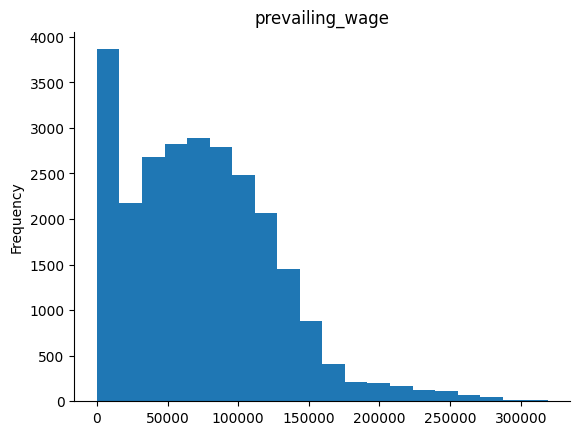

In [98]:
df2['prevailing_wage'].plot(kind='hist', bins=20, title='prevailing_wage')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='has_job_experience', ylabel='count'>

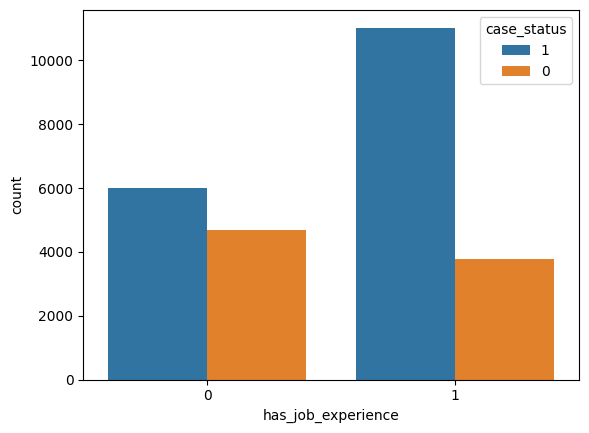

In [116]:
sns.countplot(df2, x = 'has_job_experience', hue = 'case_status')

<Axes: xlabel='full_time_position', ylabel='count'>

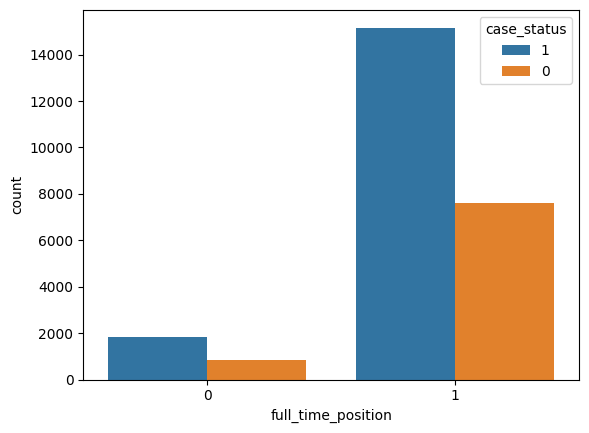

In [111]:
sns.countplot(df2, x = 'full_time_position', hue = 'case_status')


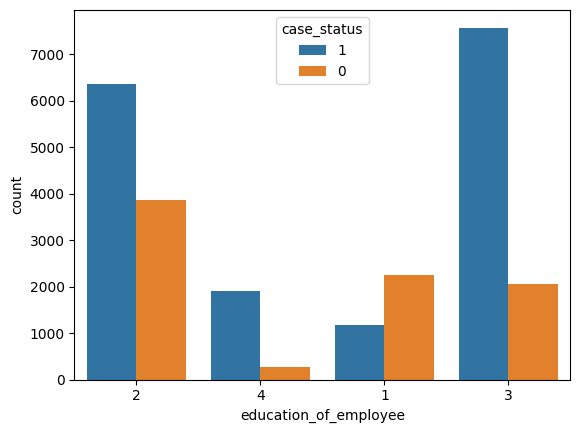

In [114]:
sns.countplot(df2, x = 'education_of_employee', hue = 'case_status')

<Axes: xlabel='requires_job_training'>

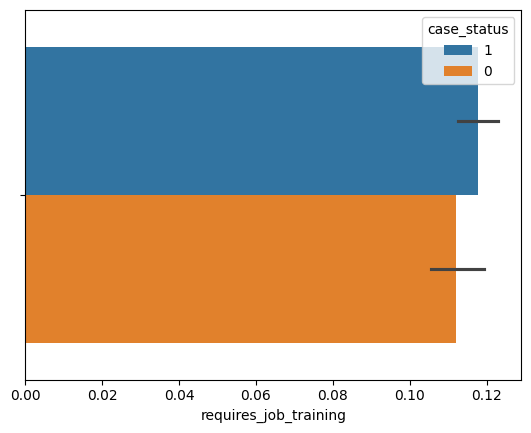

In [118]:
sns.barplot(df2, x = 'requires_job_training', hue = 'case_status')

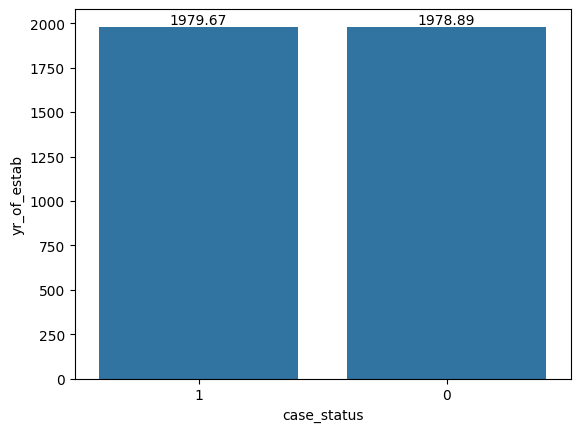

In [159]:
ax = sns.barplot(df2, x = 'case_status', y = 'yr_of_estab')
for i in ax.containers:
    ax.bar_label(i,)

## Building bagging and boosting models

**Data Splitting**

In [42]:
X = df2.drop('case_status', axis = 1) #dropping the dependent variable
y = df2.pop('case_status')

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y) #creating test and train data, stratifying to match proportions

In [44]:
def get_score(model, flag = True): #creating a function to measure performance of the models
  scores = []

  pred_train = model.predict(X_train)
  pred_test = model.predict(X_test)

  train_acc = model.score(X_train,y_train)
  test_acc = model.score(X_test,y_test)

  train_recall = metrics.recall_score(y_train,pred_train)
  test_recall = metrics.recall_score(y_test,pred_test)

  train_precision = metrics.precision_score(y_train,pred_train)
  test_precision = metrics.precision_score(y_test,pred_test)


  scores.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))

  if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

  return scores


In [45]:
def c_matrix(model, y_actual, labels=[1,0]): #creating confusion matrix function

  y_predict = model.predict(X_test)
  cm = confusion_matrix(y_test, y_predict) #making confusion matrix of the model perfomance on testing data
  plt.figure(figsize=(10,8))
  sns.heatmap(cm, annot=True, fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

**AdaBoost**

In [46]:
ada = AdaBoostClassifier(random_state=1)
ada.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

In [153]:
ada_per = get_score(ada)

Accuracy on training set :  0.7375532630634671
Accuracy on test set :  0.7335164835164835
Recall on training set :  0.889532443549064
Recall on test set :  0.8861900097943193
Precision on training set :  0.7589886835696892
Precision on test set :  0.7565217391304347


performed the best in recall, training and testing scores are similar across the board

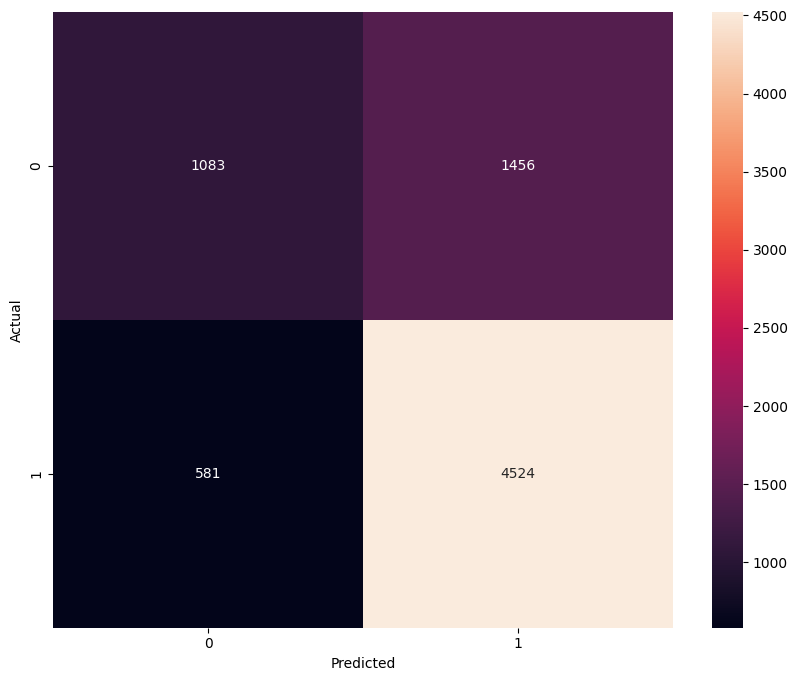

In [48]:
c_matrix(ada, y_test)

**Gradient Boosting**

In [52]:
gra = GradientBoostingClassifier(random_state=1)
gra.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [152]:
gra_per = get_score(gra)

Accuracy on training set :  0.7584099573895492
Accuracy on test set :  0.7456828885400314
Recall on training set :  0.8840762192562747
Recall on test set :  0.8775710088148874
Precision on training set :  0.7824665676077266
Precision on test set :  0.7725469908604932


performed the best in recall, training and testing scores are similar across the board. Performed slightly better than adaboost in precision and accuracy

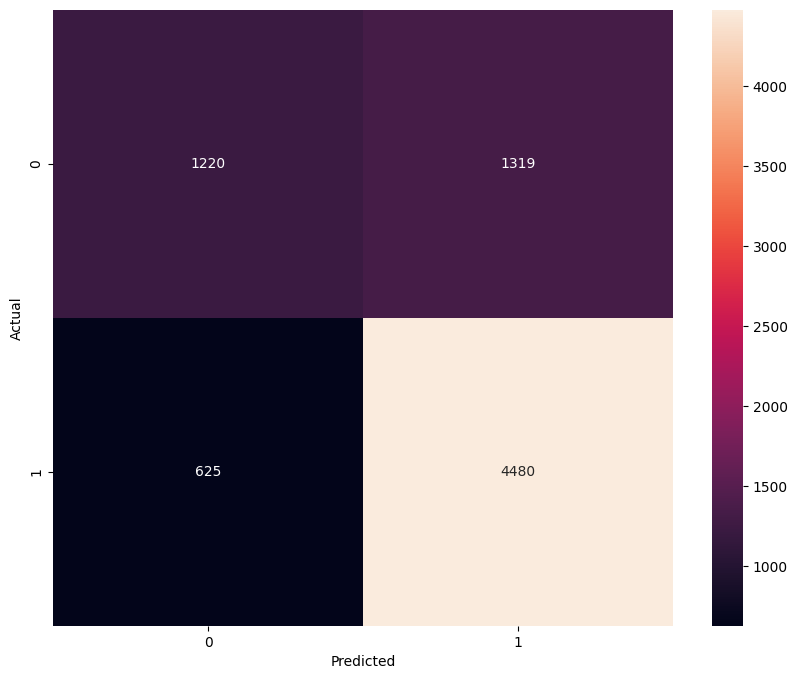

In [121]:
c_matrix(gra, y_test)

**Bagging**

In [58]:
bag = BaggingClassifier(random_state = 1)
bag.fit(X_train, y_train)

BaggingClassifier(random_state=1)

In [151]:
bag_per = get_score(bag)

Accuracy on training set :  0.9842453464902444
Accuracy on test set :  0.696493982208268
Recall on training set :  0.9848065138923865
Recall on test set :  0.7712047012732615
Precision on training set :  0.9915483434753212
Precision on test set :  0.7736293967380625


Overfit the data more than the previous models, with the training performance far outweighing the testing performance

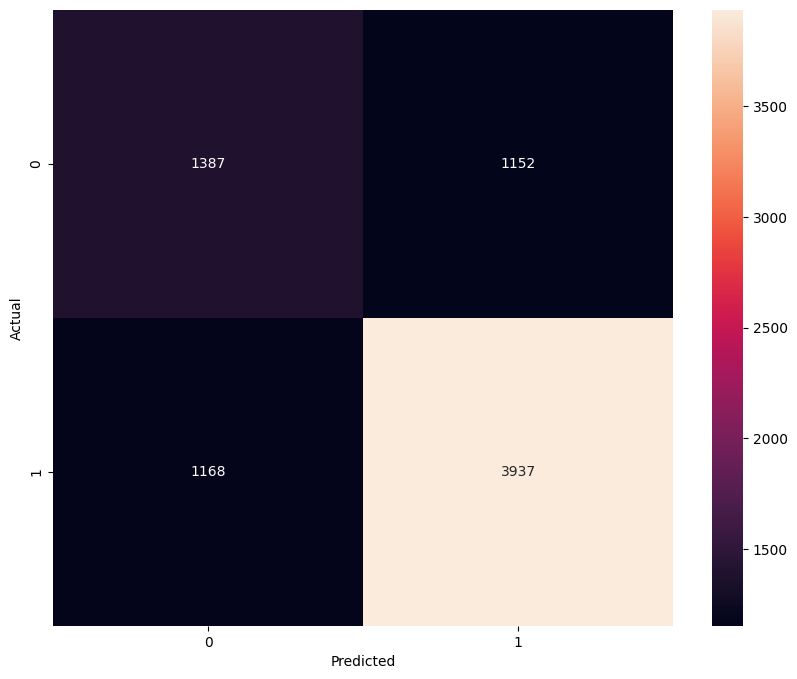

In [74]:
c_matrix(bag, y_test)

**Random Forest**

In [63]:
forest = RandomForestClassifier(random_state = 1)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [150]:
forest_per = get_score(forest)

Accuracy on training set :  1.0
Accuracy on test set :  0.7204343275771847
Recall on training set :  1.0
Recall on test set :  0.835847208619001
Precision on training set :  1.0
Precision on test set :  0.7666187567373338


Overfit the training data entirely, with no restrictions it is expected to happen

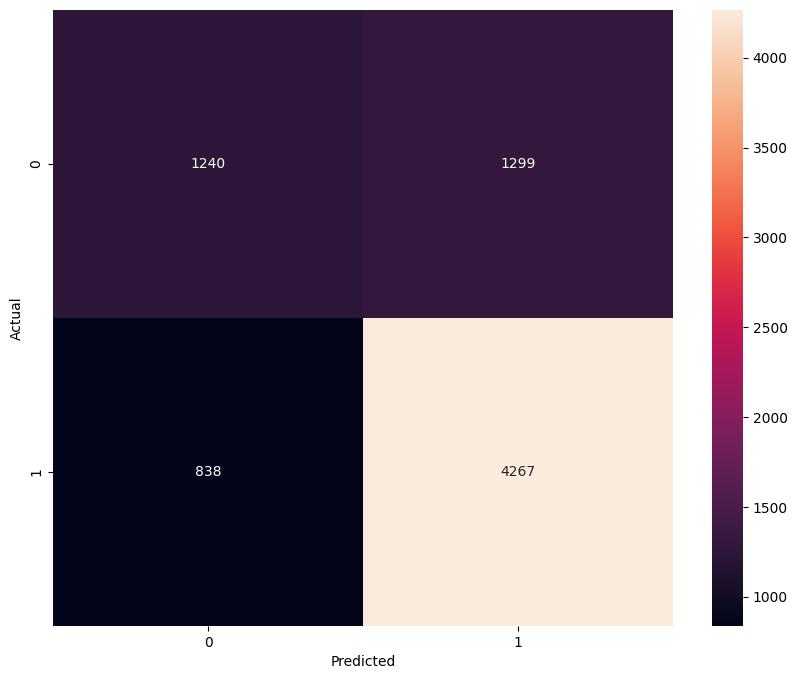

In [120]:
c_matrix(forest, y_test)

**Decision** **Tree**

In [77]:
tree = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [149]:
tree_per = get_score(tree)

Accuracy on training set :  1.0
Accuracy on test set :  0.6563317634746206
Recall on training set :  1.0
Recall on test set :  0.7330068560235063
Precision on training set :  1.0
Precision on test set :  0.7475029964043148


very similar to random forest, overfit the training

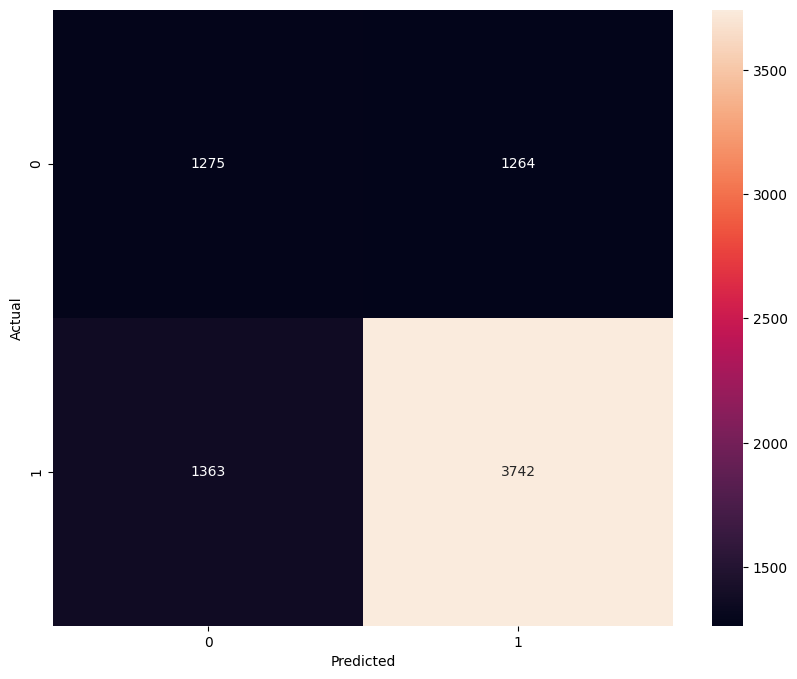

In [80]:
c_matrix(tree, y_test)

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

##  Will tuning the hyperparameters improve the model performance?

**Adaboost Tuning**

In [49]:
ada_tuned = AdaBoostClassifier(random_state=1)

param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
   ],
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(ada_tuned, param_grid, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ada_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ada_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.01, random_state=1)

In [148]:
ada_per_t = get_score(ada_tuned)

Accuracy on training set :  0.7125476564252075
Accuracy on test set :  0.706567242281528
Recall on training set :  0.9319231092084278
Recall on test set :  0.9308521057786484
Precision on training set :  0.7200674536256324
Precision on test set :  0.7154471544715447


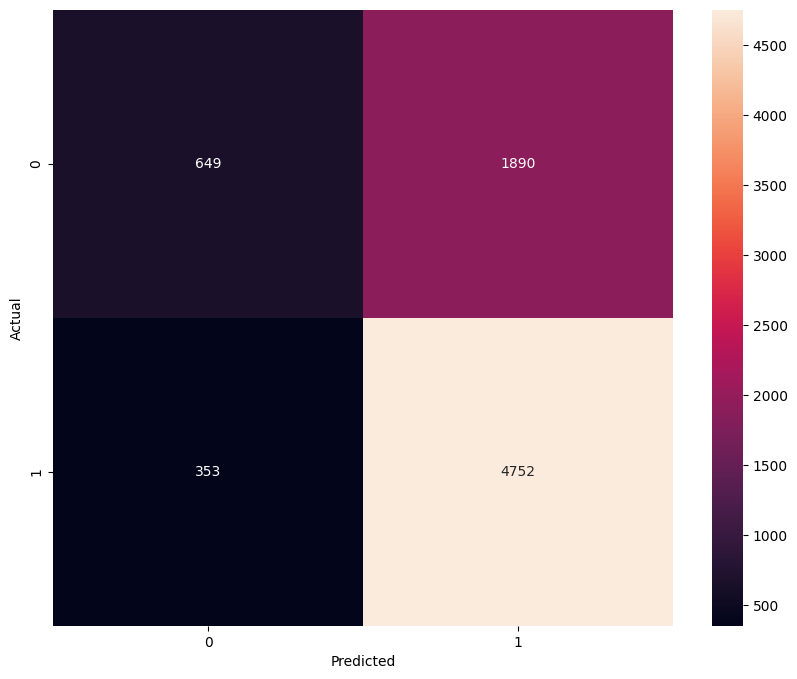

In [123]:
c_matrix(ada_tuned, y_test)

Model does not seem to be overfitting data as performance on testing and training data is similar. In comparison to the untuned adaboost model, the recall has increased, but accuracy and precision have decreased

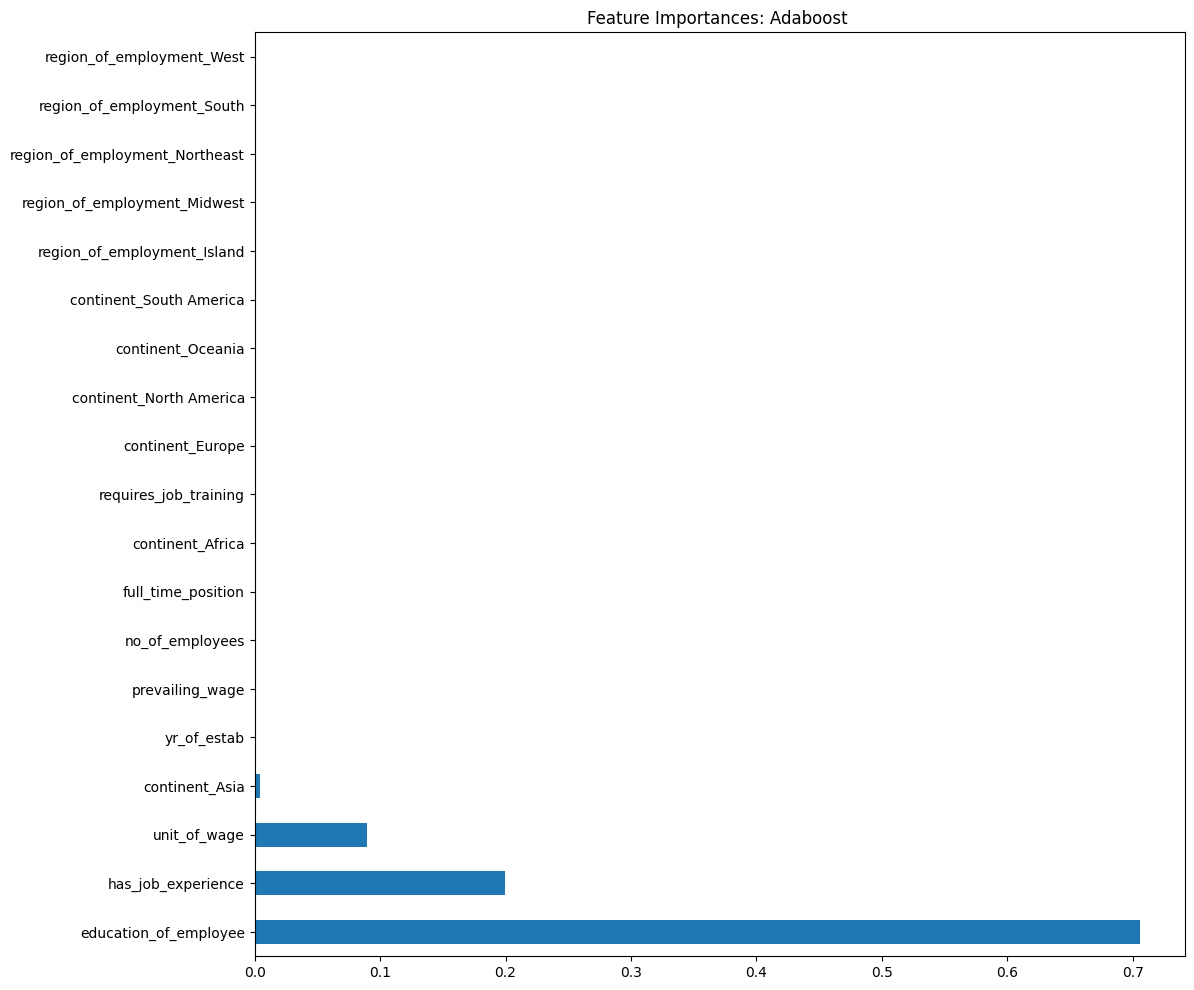

In [51]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances: Adaboost ')

feat_importances = pd.Series(ada_tuned.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

plt.show()

The most important feature for the tuned adaboost classifier is the education of the employee, followed by job experience and unit of wage

**Gradient Boosting Tuning**

In [54]:
gra_tuned = GradientBoostingClassifier(random_state = 1)

param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gra_tuned, param_grid, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gra_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gra_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=1, n_estimators=50,
                           random_state=1, subsample=0.9)

In [147]:
gra_per_t = get_score(gra_tuned)

Accuracy on training set :  0.6786274949540255
Accuracy on test set :  0.6794871794871795
Recall on training set :  0.9919415764291111
Recall on test set :  0.9921645445641528
Precision on training set :  0.6770755743998167
Precision on test set :  0.6775919732441471


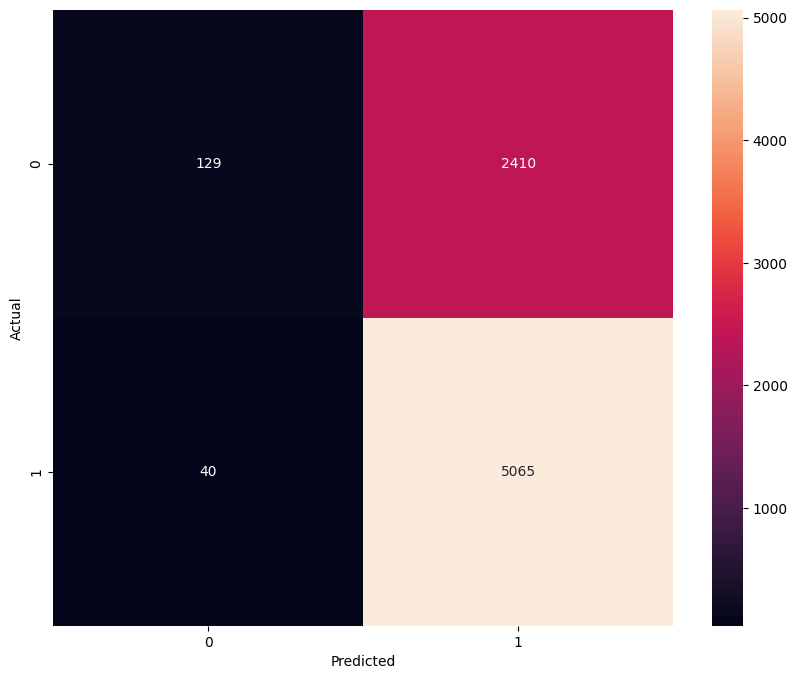

In [131]:
c_matrix(gra_tuned, y_test)

Post tuning the model decided to almost entirely predict visa acceptance, giving at very high recall but suffering when it comes to precision and accuracy

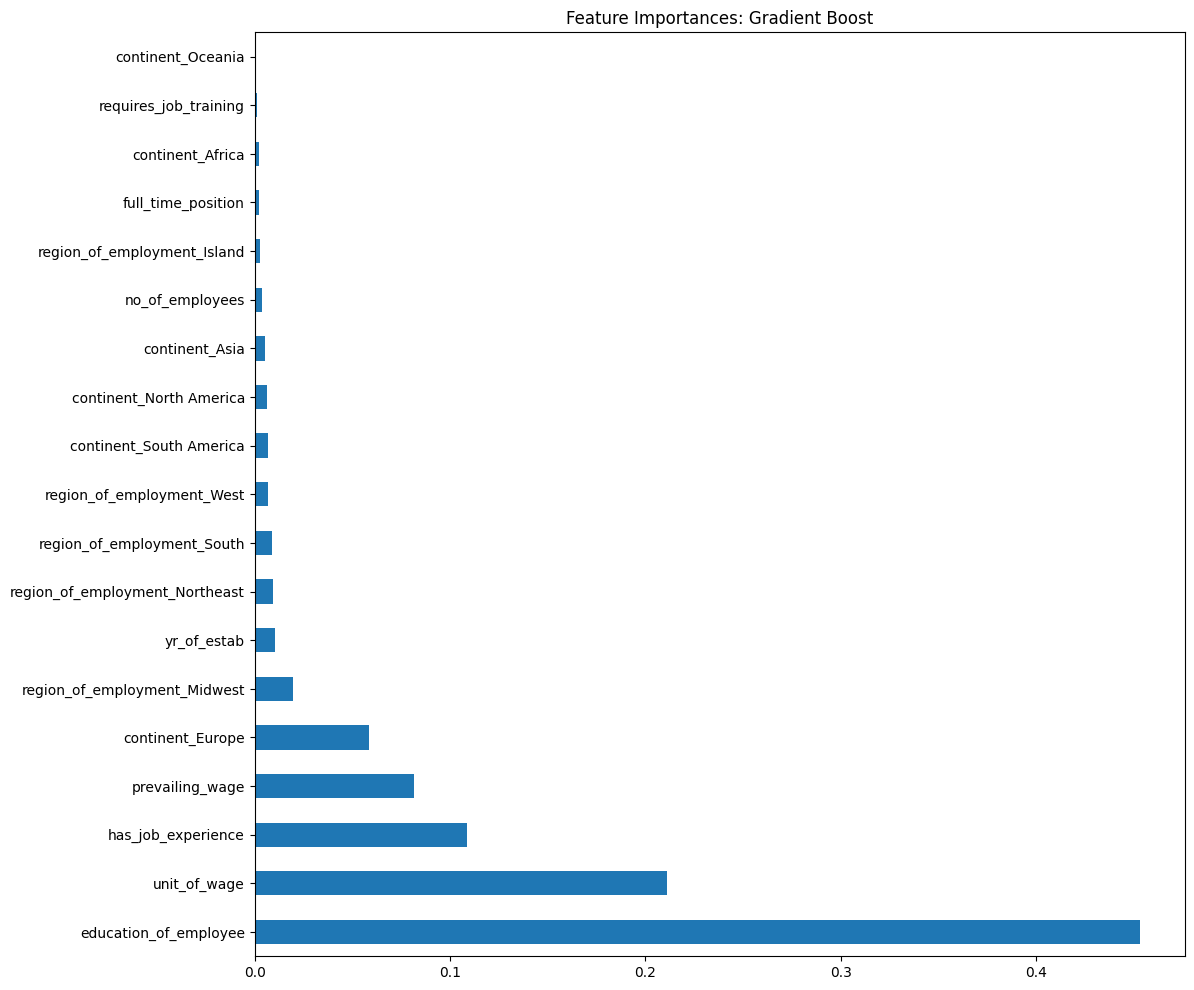

In [57]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances: Gradient Boost')

feat_importances = pd.Series(gra_tuned.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

plt.show()

The most important features are education, unit of wage, and job experience

**Bagging Tuning**

In [61]:
bag_tuned = BaggingClassifier(random_state = 1)

param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bag_tuned, param_grid, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bag_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bag_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=30,
                  random_state=1)

In [146]:
bag_per_t = get_score(bag_tuned)

Accuracy on training set :  0.6679188158779995
Accuracy on test set :  0.6678440607012036
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.6679188158779995
Precision on test set :  0.6678440607012036


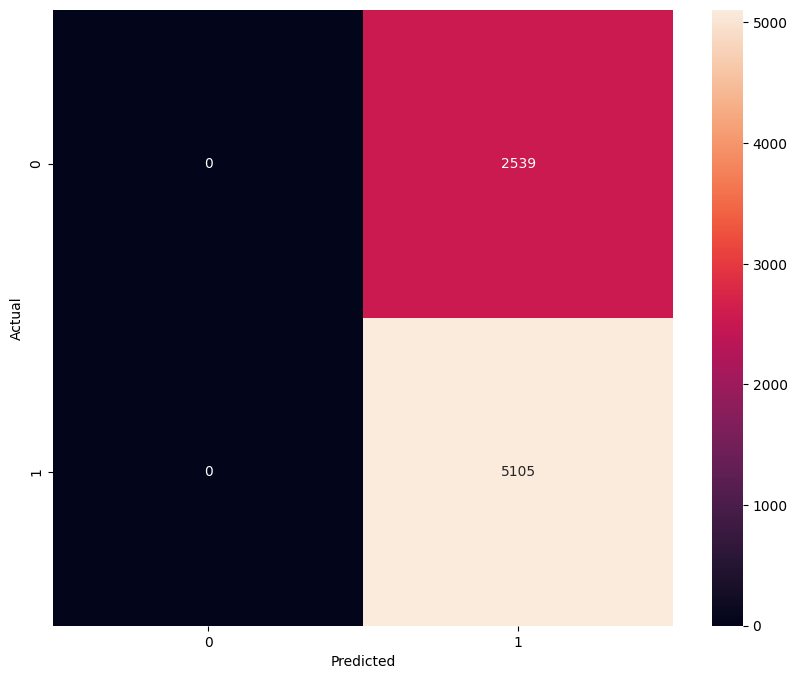

In [72]:
c_matrix(bag_tuned, y_test)

Bagging classifier predicted only approvals, has very poor performance

**Random Forest Tuning**





In [66]:
forest_tuned = RandomForestClassifier(random_state = 1)

param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(forest_tuned, param_grid, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
forest_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
forest_tuned.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.4, min_samples_leaf=3, n_estimators=110,
                       random_state=1)

In [145]:
forest_per_t = get_score(forest_tuned)

Accuracy on training set :  0.7970957613814756
Accuracy on test set :  0.7414965986394558
Recall on training set :  0.9078317804079576
Recall on test set :  0.8720861900097944
Precision on training set :  0.8109628074385123
Precision on test set :  0.7709090909090909


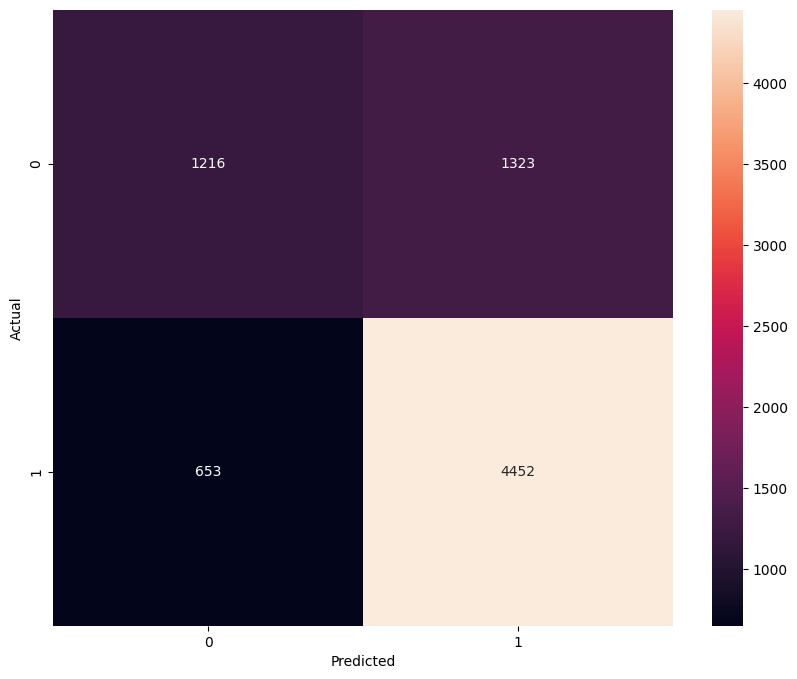

In [128]:
c_matrix(forest_tuned, y_test)

The difference between training and testing performance is reduced significantly after tuning, overfiting has been diminished but training performance is still higher across the board.

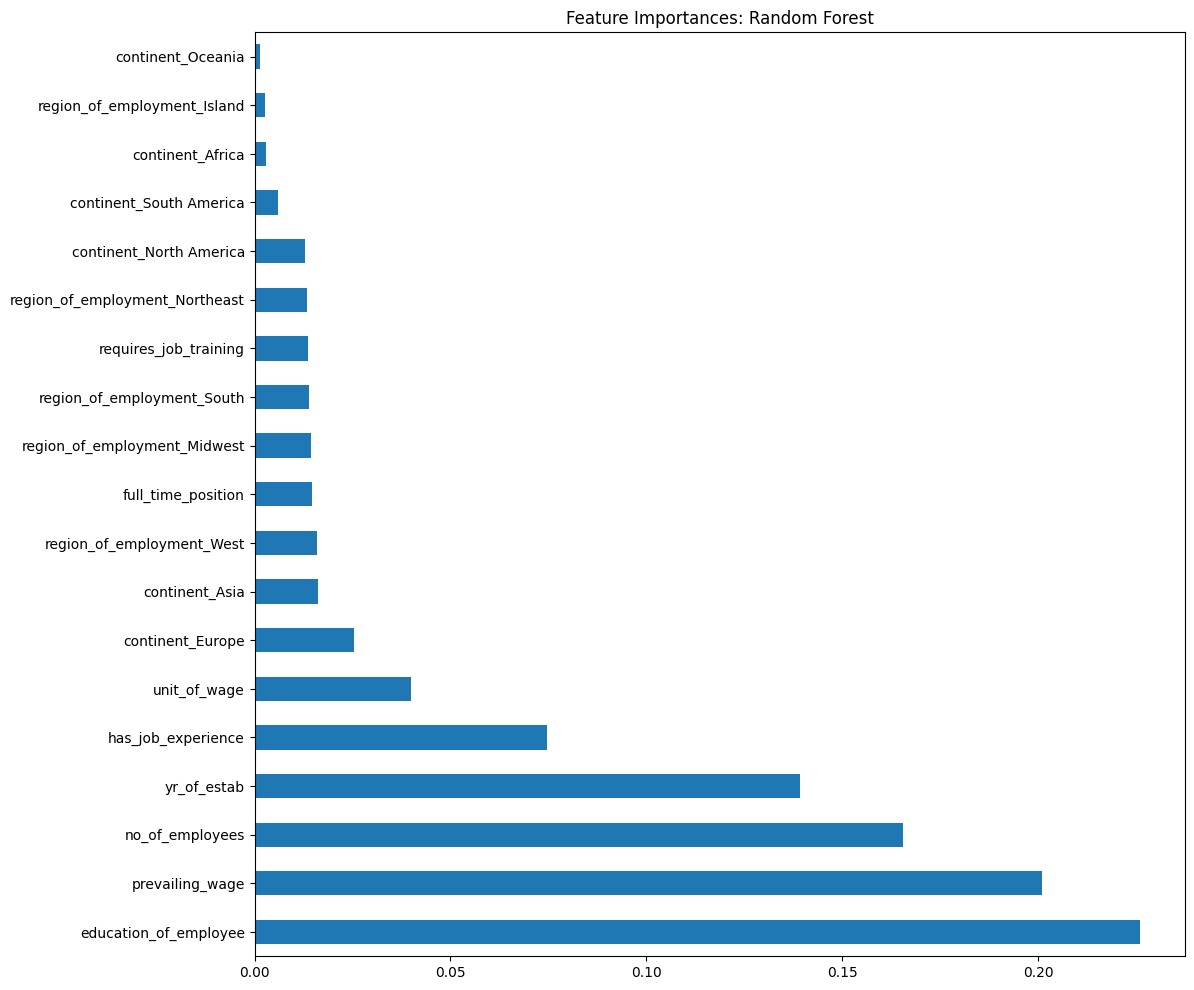

In [69]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances: Random Forest')

feat_importances = pd.Series(forest_tuned.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

plt.show()

Similarly to the other models, education is the most important feature. However, prevailing wage, number of employees, and year of establishment where valued by the model in contrast to previous models.

**Decision Tree Tuning**

In [81]:
tree_tuned = DecisionTreeClassifier(random_state = 1)


param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(tree_tuned, param_grid, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10,
                       min_impurity_decrease=0.0001, random_state=1)

In [144]:
tree_per_t = get_score(tree_tuned)

Accuracy on training set :  0.7302646333258578
Accuracy on test set :  0.7229199372056515
Recall on training set :  0.9294887937547217
Recall on test set :  0.9298726738491675
Precision on training set :  0.7360409465567668
Precision on test set :  0.7295220531735055


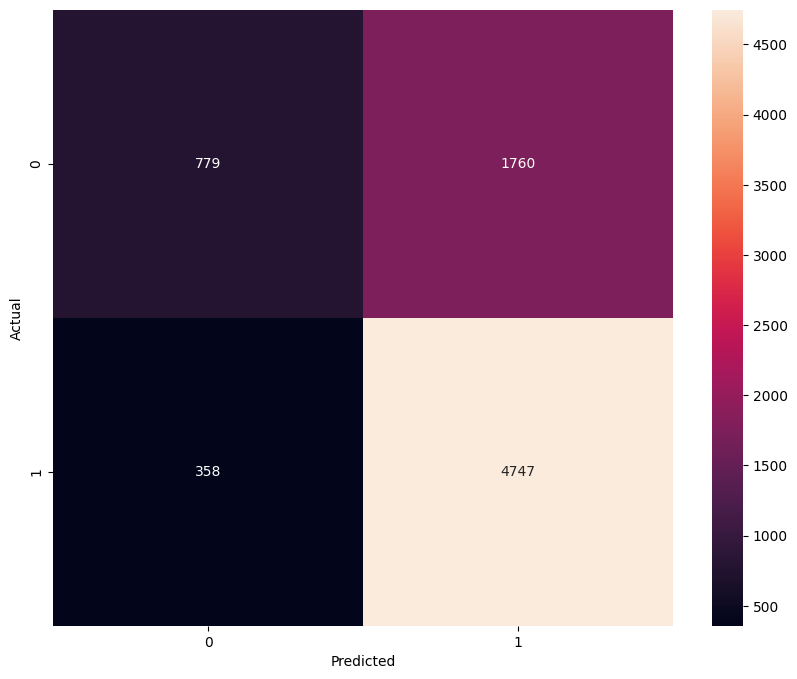

In [84]:
c_matrix(tree_tuned, y_test)

The decision tree benefited greatly from tuning, reducing major overfitting present in the untuned model. Precision, recall, and accuracy were increased across the board.

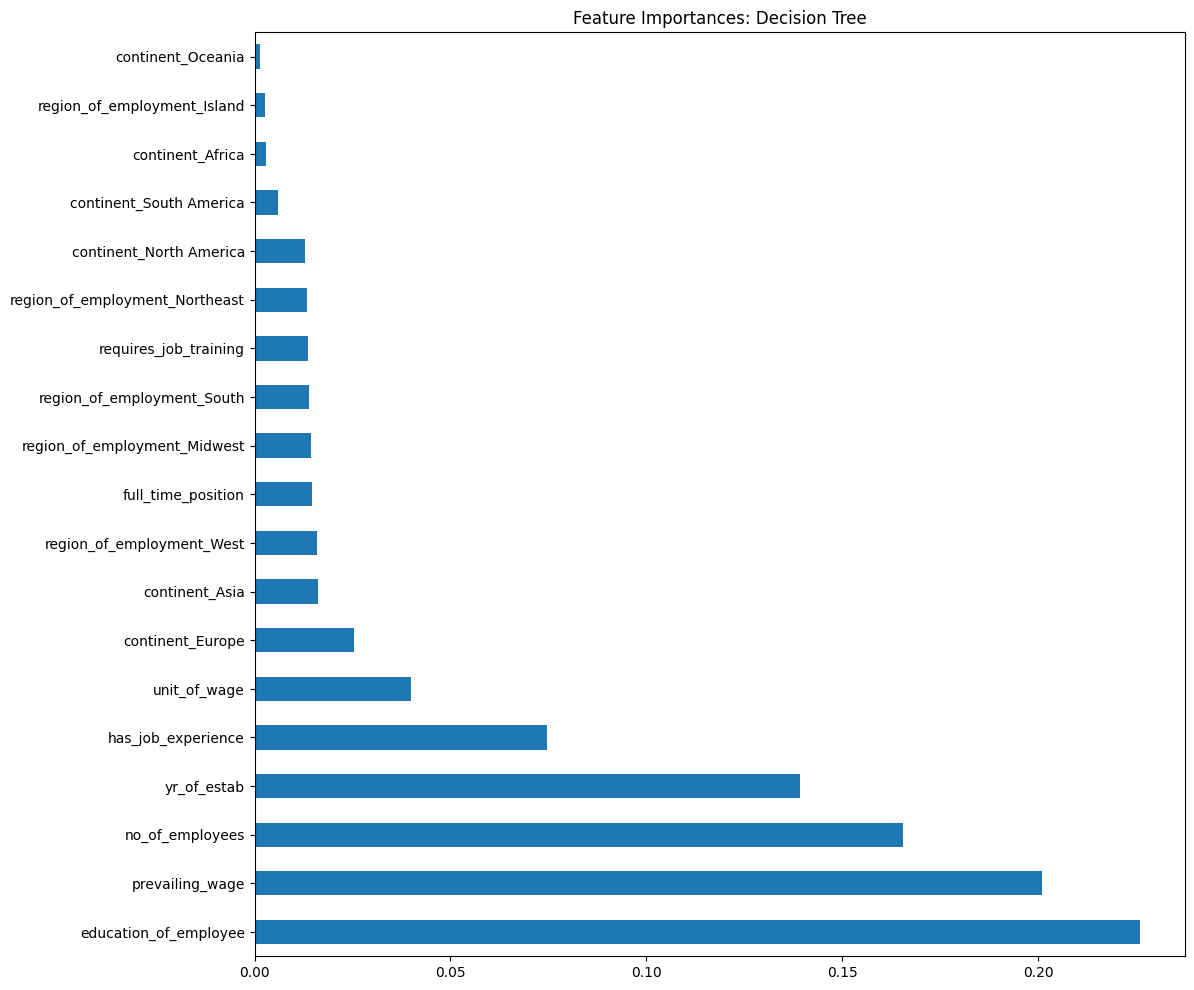

In [85]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances: Decision Tree')

feat_importances = pd.Series(forest_tuned.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

plt.show()

education is the most important feature, which is inline with the other models. Similarly to the random forest model, the decision tree used prevailing wage and number of employees to make its predictions.

**Stacking Classifier**

In [86]:
estimators=[('Decision Tree', tree_tuned),('Random Forest', forest_tuned),
           ('Gradient Boosting', gra_tuned)]
final_estimator=XGBClassifier(random_state=1) #building a stacking classifier with the tuned models from above, and make the final prediction with xgboost

In [88]:
stack = StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stack.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(max_depth=3,
                                                       max_leaf_nodes=10,
                                                       min_impurity_decrease=0.0001,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_samples=0.4,
                                                       min_samples_leaf=3,
                                                       n_estimators=110,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           lear...
                                                 feature_types=None, gamma=None,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

In [125]:
stack_per = get_score(stack)

Accuracy on training set :  0.7816214397847051
Accuracy on test set :  0.7260596546310832
Recall on training set :  0.8861747670611937
Recall on test set :  0.8546523016650343
Precision on training set :  0.8061240073304826
Precision on test set :  0.763429571303587


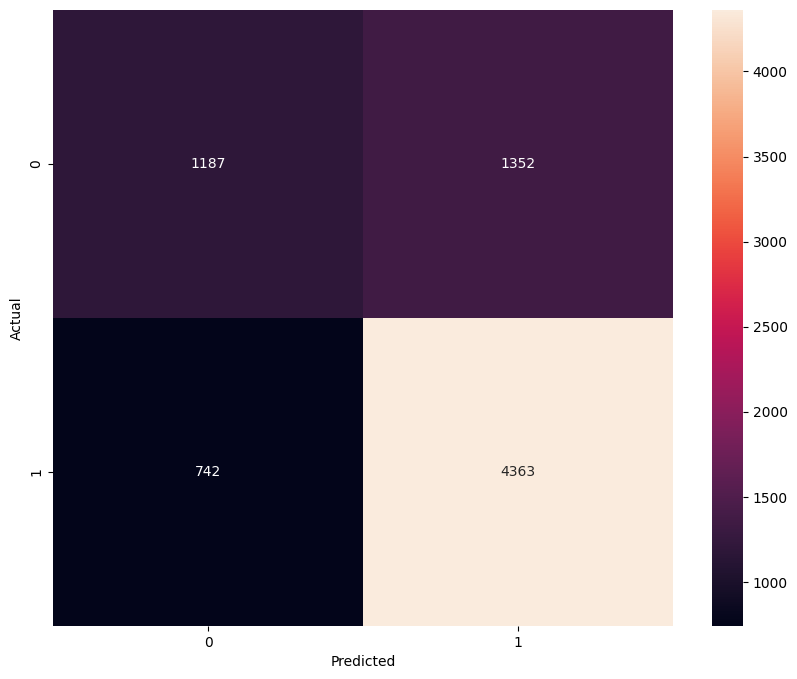

In [90]:
c_matrix(stack, y_test)

The stacking classifier performs best on recall, similarly to the previous models. The training performance is higher than testing, but does not appear to be entirely overfit.

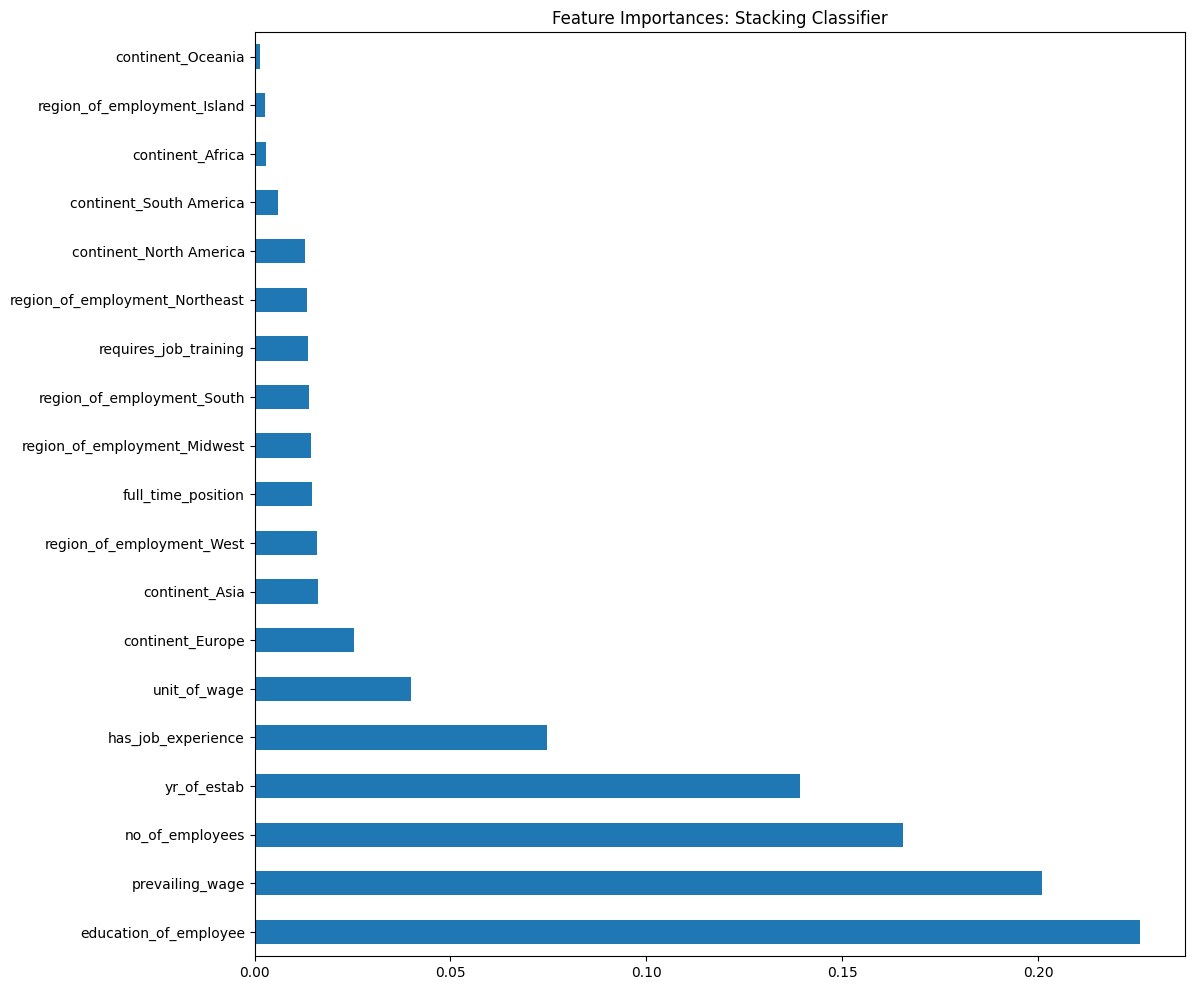

In [92]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances: Stacking Classifier')

feat_importances = pd.Series(forest_tuned.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

plt.show()

Uses education, prevailing wage, and number of employees to make its predictions.

## Model Performance Comparison and Conclusions

In [154]:
dict = {'Adaboost_Classifier':ada_per, 'Adaboost_Tuned':ada_per_t, 'Gradient_Boost':gra_per, 'Gradient_Tuned':gra_per_t, 'Bagging_Classifier':bag_per, 'Bagging_Tuned':bag_per_t,
        'Random_Forest':forest_per, 'Random_Forest_Tunned':forest_per_t,'Decision_Tree':tree_per, 'Decision_Tree_Tuned':tree_per_t, 'Stacking_Classifier':stack_per}

df_models = pd.DataFrame(dict)
df_models.insert(0, 'Metric', ['Train_Accuracy','Test_Accuracy','Train_Recall','Test_Recall','Train_Precision','Test_Precision'], True)

print('Tuned model performance')
df_models

Tuned model performance


,Metric,Adaboost_Classifier,Adaboost_Tuned,Gradient_Boost,Gradient_Tuned,Bagging_Classifier,Bagging_Tuned,Random_Forest,Random_Forest_Tunned,Decision_Tree,Decision_Tree_Tuned,Stacking_Classifier
0,Train_Accuracy,0.737553,0.712548,0.758410,0.678627,0.984245,0.667919,1.000000,0.797096,1.000000,0.730265,0.781621
1,Test_Accuracy,0.733516,0.706567,0.745683,0.679487,0.696494,0.667844,0.720434,0.741497,0.656332,0.722920,0.726060
2,Train_Recall,0.889532,0.931923,0.884076,0.991942,0.984807,1.000000,1.000000,0.907832,1.000000,0.929489,0.886175
3,Test_Recall,0.886190,0.930852,0.877571,0.992165,0.771205,1.000000,0.835847,0.872086,0.733007,0.929873,0.854652
4,Train_Precision,0.758989,0.720067,0.782467,0.677076,0.991548,0.667919,1.000000,0.810963,1.000000,0.736041,0.806124
5,Test_Precision,0.756522,0.715447,0.772547,0.677592,0.773629,0.667844,0.766619,0.770909,0.747503,0.729522,0.763430


A majority of models improved with the gridsearch tuning, the exceptions being
gradient_boost and the bagging classifier. Both of those models ended up committing a lot of type I errors.

Barring the models that exhibited significant overfitting, the best recall was achieved by the tuned adaboost classifier. A close second was the tuned decision tree, which also had better accuracy and precision. The best precision and accuracy was achieved by the untuned gradient boost classifier.



## Actionable Insights and Recommendations



*   Every model identified education as the most important factor for determining visa acceptance. An increase in acceptance rate across each level of education can be seen in the data.
*   Job experience was also found to be an influental factor for all models
*   prevailing wage appeared as an important feature in most models. As shown in the EDA, cases that had very low prevailing wage were denied visas at a much higher rate than others. Avoiding candidates with low prevailing wage could reduce the risk of denial.
*   number of employees also showed up as an important factor in many models. Larger companies seem to have a better chance of visa approval.
*   The continent of origin from the candidates was found to be irrelevant by most models, so it appears that candidates are welcome from across the globe. Adding data regarding specific countries might be a good idea to better explore this variable.
*   Unit of wage was also used by the models in their predictions. In the EDA it displayed that candidates getting their wages on a yearly basis were the most favored by the application process.
*   After looking at the data, I recommend using education level, job experience, company size, and unit of wage to help build a shortlist of candidates. Other variables may be worth exploring but those are the ones that are most favored by the models.
  









In [ ]:
!jupyter nbconvert --to html DB_EasyVisa_FullCode.ipynb